In [85]:
# Loading in the appropriate libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading in the data
data = pd.read_csv('data/data.csv',encoding='ISO-8859-1')

#performing train/test split on the data
train = data[data['Date'] < '20150601']
test = data[data['Date'] >= '20150601']

In [74]:
# cleaning the data
X_train = train.iloc[:,2:27]
X_train.replace(to_replace="[^a-zA-Z]", value=" ", inplace=True, regex=True)
X_train.replace(to_replace="b ", value="", inplace=True, regex=True)

X_test = test.iloc[:,2:27]
X_test.replace(to_replace="[^a-zA-Z]", value=" ", inplace=True, regex=True)
X_test.replace(to_replace="b ", value="", inplace=True, regex=True)

y_train = train["Label"]
y_test = test['Label']

In [75]:
# renaming index
ind = []
for i in range(25):
    ind.append(str(i))
X_train.columns = ind
X_test.columns = ind

In [76]:
# converting text data to lowercase
for column in ind:
    X_train[column] = X_train[column].str.lower()

for column in ind:
    X_test[column] = X_test[column].str.lower()

In [77]:
# joining text data
train_headlines = []
for row in range(0,len(X_train.index)):
    train_headlines.append(' '.join(str(x) for x in X_train.iloc[row,0:25]))

test_headlines = []
for row in range(0,len(X_test.index)):
    test_headlines.append(' '.join(str(x) for x in X_test.iloc[row,0:25]))

In [108]:
# convert a collection of text documents to a matrix of token counts
cvect = CountVectorizer(ngram_range=(2,3))
X_vect_train = cvect.fit_transform(train_headlines)
X_vect_test = cvect.transform(test_headlines)

In [109]:
# create model instance and fit to training data
lgr = LogisticRegression()
lgr = lgr.fit(X_vect_train, y_train)

In [110]:
lgr.score(X_vect_test,y_test)

0.5952380952380952

In [111]:
predictions = lgr.predict(X_vect_test)

# print classification report and accuracy
print(classification_report(test["Label"], predictions))
print(accuracy_score(test["Label"], predictions))

              precision    recall  f1-score   support

           0       0.57      0.38      0.45        56
           1       0.61      0.77      0.68        70

   micro avg       0.60      0.60      0.60       126
   macro avg       0.59      0.57      0.57       126
weighted avg       0.59      0.60      0.58       126

0.5952380952380952


In [112]:
lgr.coef_

array([[-0.00686587, -0.00686587, -0.00718808, ..., -0.00585193,
         0.00534102,  0.00534102]])

In [113]:
important_words = pd.DataFrame({'word': cvect.get_feature_names(), 'coef': lgr.coef_[0]})

In [119]:
up_pred_words = important_words.nlargest(n=20,columns='coef').reset_index(drop=True)

In [120]:
down_pred_words = important_words.nsmallest(n=20,columns='coef').reset_index(drop=True).sort_values(by='coef',ascending=False)

In [121]:
df = up_pred_words.append(down_pred_words)

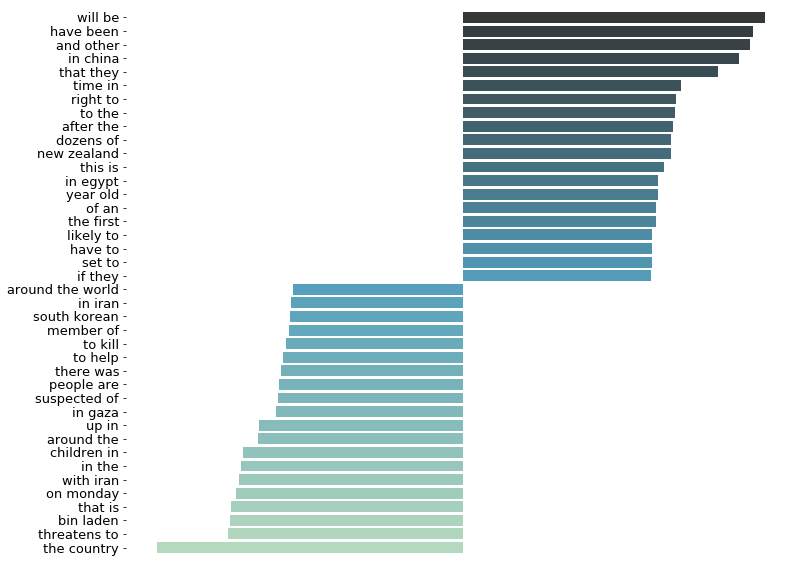

In [125]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x = df['coef'],y=df['word'],palette="GnBu_d")
plt.xticks([])
plt.ylabel("")
plt.xlabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize=13);